- As I look for the most capable classification algorithm, models like randomForests, SVM and gradient
boosted algorithms like XGBoost will be tested to find one which gives the highest accuracy.

- Ensemble techniques like bagging and pasting, voting classification & adaptive boost will also be tested
- Models will be evaluated using metrics like the confusion matrix, and accuracy 
- The most capable model will be selected and fine-tuned for improved performance

### IMPORTING LIBRARIES

In [5]:
import numpy as np
import pandas as pd

### SPLITTING THE DATASETS

In [6]:
train_data = pd.read_csv('../datasets/mnist_train.csv')
test_data = pd.read_csv('../datasets/mnist_test.csv')

X_train, y_train = train_data.iloc[:, 1:].values, train_data.iloc[:, 0].values
X_test, y_test = test_data.iloc[:, 1:].values, test_data.iloc[:, 0].values 

# TRAINING & EVALUATING CLASSIFICATION ALGORITHMS

- ### IMPORTING CLASSIFICATION ALGORITHMS

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

forestClassifier = RandomForestClassifier() # The Random Forests Classifier  
vectorClassifier = SVC(kernel='rbf') # A Support Vector Machine with rbf kernel
xgb = XGBClassifier() # An XGBoost classifier

# A list of models
raw_models = [forestClassifier, vectorClassifier, xgb]

- ### MODEL TRAINING FUNCTION
Takes a list of models & the training dataset, trains and returns a list of trained models

In [8]:
def trainer(model_list, X_train_, y_train_):
    _trained_models = []
    for model in model_list:
        _trained_models.append(model.fit(X_train_, y_train_))
    
    return _trained_models


trained_models = trainer(raw_models, X_train, y_train)

- ### MODEL PREDICTION AND EVALUATION ON TEST DATA
A class that takes a list of trained models, make predictions on the test data and evaluates their peformance

In [15]:
from sklearn.metrics import accuracy_score

class model_eval:
    def __init__(self, X_test_, y_test_, trained_models_):
        self.X_test_ = X_test_
        self.y_test_ = y_test_
        self.trained_models_ = trained_models_
        self.metrics = []
        
    
    def model_predict(self):
        for model in self.trained_models_:
            self.metrics.append({model: f"Accuracy {accuracy_score(model.predict(self.X_test_), self.y_test_)}"})
    def display_metrics(self): 
        return self.metrics     

In [16]:
model_eval = model_eval(X_test, y_test, trained_models)

In [17]:
model_eval.model_predict()

In [18]:
model_eval.display_metrics()

[{RandomForestClassifier(): 'Accuracy 0.9698'},
 {SVC(): 'Accuracy 0.9792'},
 {XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob', ...): 'Accuracy 0.9795'}]

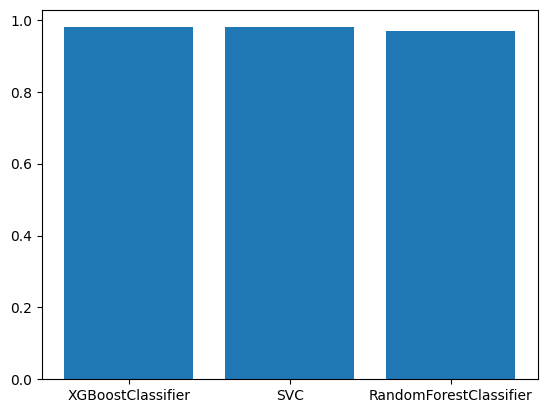

In [23]:
import matplotlib.pyplot as plt
plt.bar(["XGBoostClassifier", "SVC", "RandomForestClassifier"], [0.9795, 0.9792, 0.9698])
plt.show()

# USING ENSEMBLE METHODS